In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# LOAD THE DATASET
df = pd.read_csv(r"C:\DATASCIENCE\RonyProject\Age and Emotion Detection through voice\cleaned_gender.csv.zip")

In [3]:
df.head()

,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,0.929512,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0,4.687500,4.687500,0.076296,male
1,84,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,0.911080,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0,6.046875,6.046875,0.135811,male
2,85,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,0.936040,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0,6.539062,6.539062,0.096102,male
3,87,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,0.958362,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0,5.812500,5.812500,0.081880,male
4,88,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,0.969568,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0,1.078125,1.078125,0.131579,male


In [4]:
df=df.drop([df.columns[0]],axis=1)
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [5]:
print(df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [6]:
df.shape

(4361, 21)

In [7]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,0.186093,0.057006,0.190335,0.145796,0.230877,0.085081,1.971404,7.933659,0.915496,0.443468,0.185193,0.186093,0.130606,0.047334,0.277241,0.944215,0.016252,7.105706,7.089454,0.101832
std,0.019862,0.009515,0.026870,0.031776,0.018412,0.028191,0.579158,3.329032,0.025962,0.121583,0.055095,0.019862,0.016937,0.000405,0.002250,0.398433,0.045230,2.963021,2.963914,0.037590
min,0.130253,0.031227,0.107668,0.057482,0.177122,0.020521,0.550830,2.377435,0.838816,0.141281,0.002527,0.130253,0.093660,0.046921,0.271186,0.071470,0.000000,0.375000,0.375000,0.005507
25%,0.172234,0.050947,0.171007,0.122285,0.218621,0.059621,1.546014,5.363785,0.898416,0.355402,0.135029,0.172234,0.118378,0.047013,0.275862,0.641129,0.000000,5.109375,5.109375,0.074496
50%,0.184996,0.058363,0.191987,0.140107,0.232547,0.092520,1.917493,7.170027,0.918524,0.440672,0.192089,0.184996,0.126001,0.047198,0.277457,0.900000,0.000000,6.515625,6.492188,0.097698
75%,0.199711,0.063295,0.210788,0.168432,0.244517,0.108387,2.371233,9.873117,0.934720,0.530726,0.227678,0.199711,0.139656,0.047525,0.279070,1.192127,0.000000,9.140625,9.140625,0.126405
max,0.241377,0.082588,0.257051,0.235086,0.270893,0.150842,3.600165,17.922685,0.973249,0.785258,0.280000,0.241377,0.178343,0.048632,0.279070,2.102571,0.351562,15.210938,15.210938,0.208333


In [8]:
df.label.value_counts()

male      3343
female    1018
Name: label, dtype: int64

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  4361 non-null   float64
 1   sd        4361 non-null   float64
 2   median    4361 non-null   float64
 3   Q25       4361 non-null   float64
 4   Q75       4361 non-null   float64
 5   IQR       4361 non-null   float64
 6   skew      4361 non-null   float64
 7   kurt      4361 non-null   float64
 8   sp.ent    4361 non-null   float64
 9   sfm       4361 non-null   float64
 10  mode      4361 non-null   float64
 11  centroid  4361 non-null   float64
 12  meanfun   4361 non-null   float64
 13  minfun    4361 non-null   float64
 14  maxfun    4361 non-null   float64
 15  meandom   4361 non-null   float64
 16  mindom    4361 non-null   float64
 17  maxdom    4361 non-null   float64
 18  dfrange   4361 non-null   float64
 19  modindx   4361 non-null   float64
 20  label     4361 non-null   obje

In [10]:
# DICTONARY FUNCTION
dict = {'label':{'male':1,'female':0}}      
df.replace(dict,inplace = True)           
X = df.loc[:, df.columns != 'label']
y = df.loc[:,'label']

<Axes: >

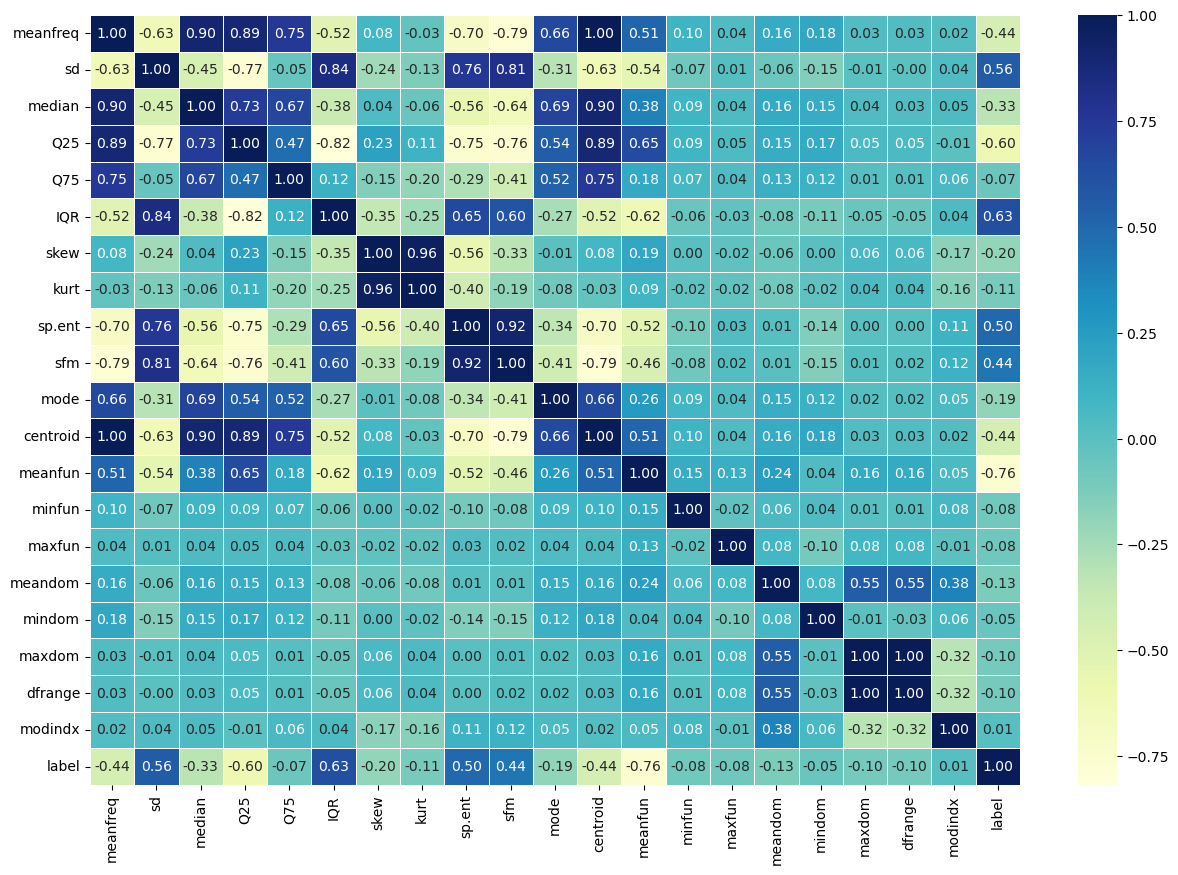

In [11]:
# CORRELATION
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
model_acc = []

In [14]:
svm_c = 1000
svm_gamma = 0.01

dtc_md = 5

rfc_M = 8
rfc_d = 8
rfc_m = 6

In [15]:
model_acc = []

In [16]:
model_acc = []

In [17]:
SVM_model = SVC(C=svm_c, gamma=svm_gamma).fit(X_train, y_train)
train_acc = SVM_model.score(X_train, y_train)
test_acc = SVM_model.score(X_test, y_test)
m = 'SVM'
model_acc.append([m, train_acc, test_acc])

DTC_model = DecisionTreeClassifier(max_depth=dtc_md).fit(X_train, y_train)
train_acc = DTC_model.score(X_train, y_train)
test_acc = DTC_model.score(X_test, y_test)
m = 'Decision Tree Classifier'
model_acc.append([m, train_acc, test_acc])

RFC_model = RandomForestClassifier(n_estimators=rfc_M, max_features=rfc_d, max_depth=rfc_m, random_state=0).fit(X_train, y_train)
train_acc = RFC_model.score(X_train, y_train)
test_acc = RFC_model.score(X_test, y_test)
m = 'Random Forest Classifier'
model_acc.append([m, train_acc, test_acc])

In [18]:
print("Feature importance of Decision Tree Classifier: ")
np.array([X.columns.values.tolist(), list(DTC_model.feature_importances_)]).T

Feature importance of Decision Tree Classifier: 


array([['meanfreq', '0.0'],
       ['sd', '0.049649880416216784'],
       ['median', '0.0028602361685353133'],
       ['Q25', '0.07004635355307297'],
       ['Q75', '0.002064623943979152'],
       ['IQR', '0.013528016920517786'],
       ['skew', '0.0'],
       ['kurt', '0.0'],
       ['sp.ent', '0.005154648333885555'],
       ['sfm', '0.00480241608204413'],
       ['mode', '0.010374663092308188'],
       ['centroid', '0.0'],
       ['meanfun', '0.8161671259717133'],
       ['minfun', '0.0'],
       ['maxfun', '0.002028402471277766'],
       ['meandom', '0.003221027998371632'],
       ['mindom', '0.0'],
       ['maxdom', '0.008175677381855014'],
       ['dfrange', '0.008001320642613862'],
       ['modindx', '0.003925607023608612']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

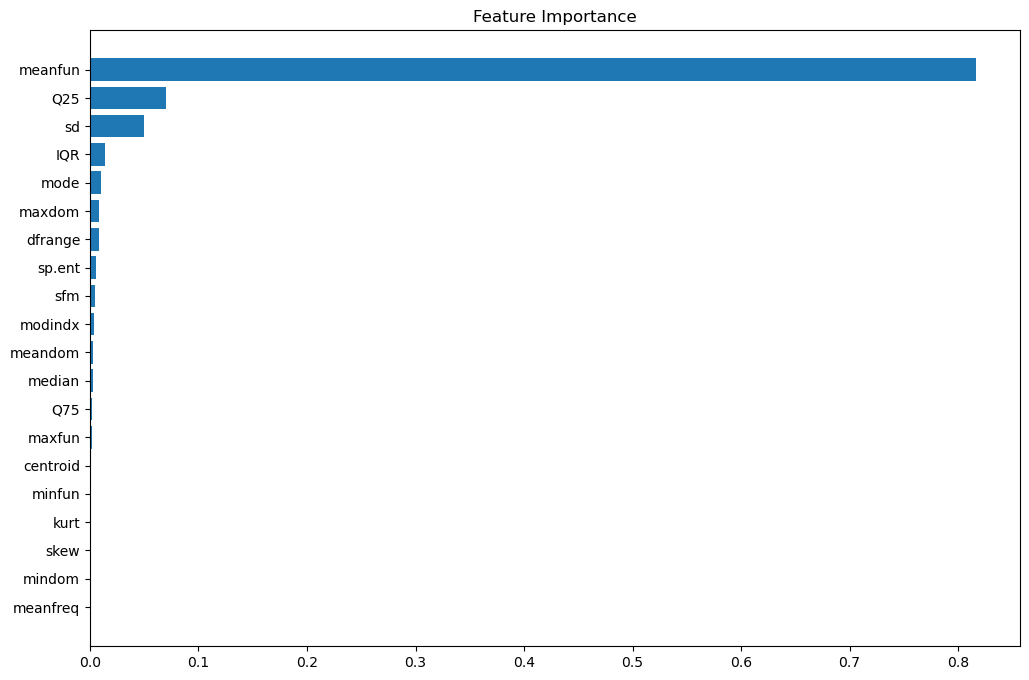

In [19]:
importances = DTC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [20]:
print("Feature importance of Random Forest Classifier: ")
np.array([X.columns.values.tolist(), list(RFC_model.feature_importances_)]).T

Feature importance of Random Forest Classifier: 


array([['meanfreq', '0.007032941391936297'],
       ['sd', '0.1533839020962837'],
       ['median', '0.015825569798993952'],
       ['Q25', '0.08241789401561826'],
       ['Q75', '0.005813587550843308'],
       ['IQR', '0.09468652995767417'],
       ['skew', '0.006956155325977298'],
       ['kurt', '0.006795165819974068'],
       ['sp.ent', '0.005115529735414466'],
       ['sfm', '0.0076495969013560495'],
       ['mode', '0.009047062376050595'],
       ['centroid', '0.01189897180098645'],
       ['meanfun', '0.5615881200661832'],
       ['minfun', '0.002063424728904245'],
       ['maxfun', '0.0017464587234057968'],
       ['meandom', '0.01081111422912823'],
       ['mindom', '0.0014954135658682977'],
       ['maxdom', '0.006952261219783515'],
       ['dfrange', '0.005442768870526677'],
       ['modindx', '0.0032775318250915834']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

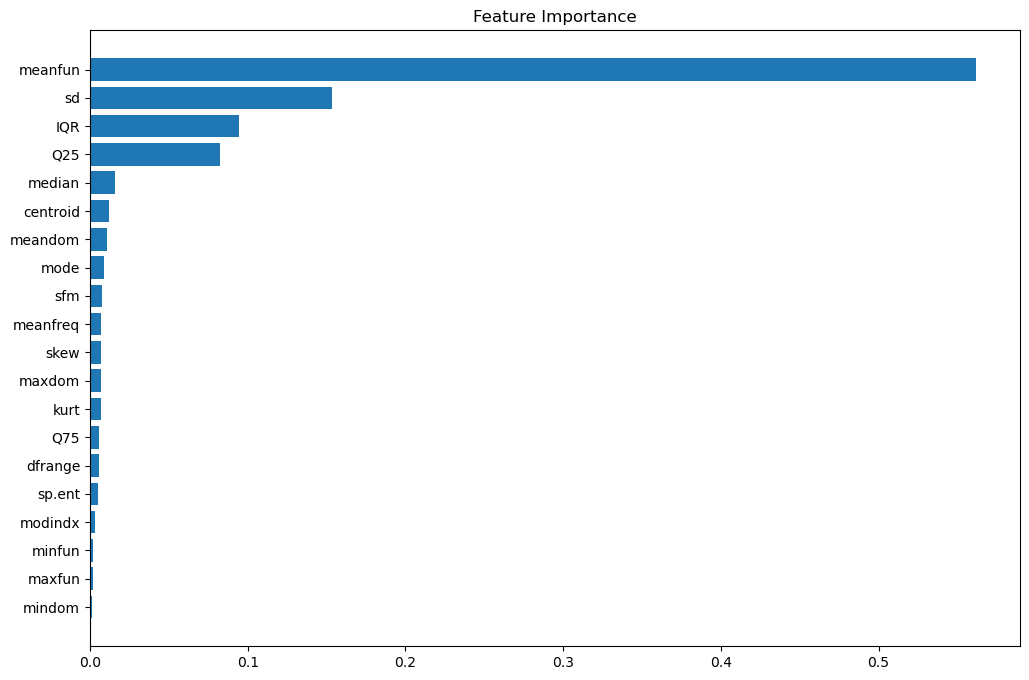

In [21]:

importances = RFC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [22]:
result = pd.DataFrame(model_acc, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])
result[['Model', 'Training Accuracy', 'Validation Accuracy']]

,Model,Training Accuracy,Validation Accuracy
0,SVM,0.936697,0.927589
1,Decision Tree Classifier,0.951070,0.924840
2,Random Forest Classifier,0.962080,0.933089


In [23]:
df_new = df[['meanfun', 'sd', 'Q25', 'IQR','mode','median','label']]
df_new.head()

,meanfun,sd,Q25,IQR,mode,median,label
0,0.121968,0.069304,0.089192,0.106075,0.086962,0.107668,1
1,0.111204,0.058518,0.092841,0.107238,0.101332,0.112037,1
2,0.118711,0.065447,0.093455,0.109455,0.106545,0.112242,1
3,0.116200,0.072849,0.082861,0.120892,0.108583,0.113360,1
4,0.114802,0.070407,0.076098,0.120089,0.101534,0.113418,1


In [24]:
X = df_new.loc[:, df_new.columns != 'label']
y = df_new.loc[:,'label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
feat_rf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
feat_his = feat_rf.fit(X_train,y_train)

In [27]:
print(feat_his.score(X_train,y_train))
print(feat_his.score(X_test,y_test))

1.0
0.9450045829514208


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=6)
clf = RandomForestClassifier(n_estimators=rfc_M, max_features=6, max_depth=rfc_m, random_state=0)
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=6)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=6, max_features=6,
                                        n_estimators=8, random_state=0))])

In [29]:
print(anova_svm.score(X_train,y_train))
print(anova_svm.score(X_test,y_test))

0.9574923547400611
0.9404216315307058


## Age Detection

In [30]:
df = pd.read_csv(r"C:\DATASCIENCE\RonyProject\Age and Emotion Detection through voice\cleaned_age.csv.zip")

In [31]:
df.head()

,Unnamed: 0.1,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,67,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0,4.687500,4.687500,0.076296,young
1,84,85,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0,6.046875,6.046875,0.135811,young
2,85,86,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0,6.539062,6.539062,0.096102,matured
3,87,88,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0,5.812500,5.812500,0.081880,young
4,88,89,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0,1.078125,1.078125,0.131579,matured


In [32]:
df=df.drop([df.columns[0], df.columns[1]],axis=1)
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [33]:
print(df.isnull().sum())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


In [34]:
df.shape

(4361, 21)

In [35]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,0.186093,0.057006,0.190335,0.145796,0.230877,0.085081,1.971404,7.933659,0.915496,0.443468,0.185193,0.186093,0.130606,0.047334,0.277241,0.944215,0.016252,7.105706,7.089454,0.101832
std,0.019862,0.009515,0.026870,0.031776,0.018412,0.028191,0.579158,3.329032,0.025962,0.121583,0.055095,0.019862,0.016937,0.000405,0.002250,0.398433,0.045230,2.963021,2.963914,0.037590
min,0.130253,0.031227,0.107668,0.057482,0.177122,0.020521,0.550830,2.377435,0.838816,0.141281,0.002527,0.130253,0.093660,0.046921,0.271186,0.071470,0.000000,0.375000,0.375000,0.005507
25%,0.172234,0.050947,0.171007,0.122285,0.218621,0.059621,1.546014,5.363785,0.898416,0.355402,0.135029,0.172234,0.118378,0.047013,0.275862,0.641129,0.000000,5.109375,5.109375,0.074496
50%,0.184996,0.058363,0.191987,0.140107,0.232547,0.092520,1.917493,7.170027,0.918524,0.440672,0.192089,0.184996,0.126001,0.047198,0.277457,0.900000,0.000000,6.515625,6.492188,0.097698
75%,0.199711,0.063295,0.210788,0.168432,0.244517,0.108387,2.371233,9.873117,0.934720,0.530726,0.227678,0.199711,0.139656,0.047525,0.279070,1.192127,0.000000,9.140625,9.140625,0.126405
max,0.241377,0.082588,0.257051,0.235086,0.270893,0.150842,3.600165,17.922685,0.973249,0.785258,0.280000,0.241377,0.178343,0.048632,0.279070,2.102571,0.351562,15.210938,15.210938,0.208333


In [36]:
df.label.value_counts()

matured    1983
young      1816
old         562
Name: label, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  4361 non-null   float64
 1   sd        4361 non-null   float64
 2   median    4361 non-null   float64
 3   Q25       4361 non-null   float64
 4   Q75       4361 non-null   float64
 5   IQR       4361 non-null   float64
 6   skew      4361 non-null   float64
 7   kurt      4361 non-null   float64
 8   sp.ent    4361 non-null   float64
 9   sfm       4361 non-null   float64
 10  mode      4361 non-null   float64
 11  centroid  4361 non-null   float64
 12  meanfun   4361 non-null   float64
 13  minfun    4361 non-null   float64
 14  maxfun    4361 non-null   float64
 15  meandom   4361 non-null   float64
 16  mindom    4361 non-null   float64
 17  maxdom    4361 non-null   float64
 18  dfrange   4361 non-null   float64
 19  modindx   4361 non-null   float64
 20  label     4361 non-null   obje

In [38]:
dict = {'label':{'old':2,'matured':1,'young':0}}      
df.replace(dict,inplace = True)           
X = df.loc[:, df.columns != 'label']
y = df.loc[:,'label']

<Axes: >

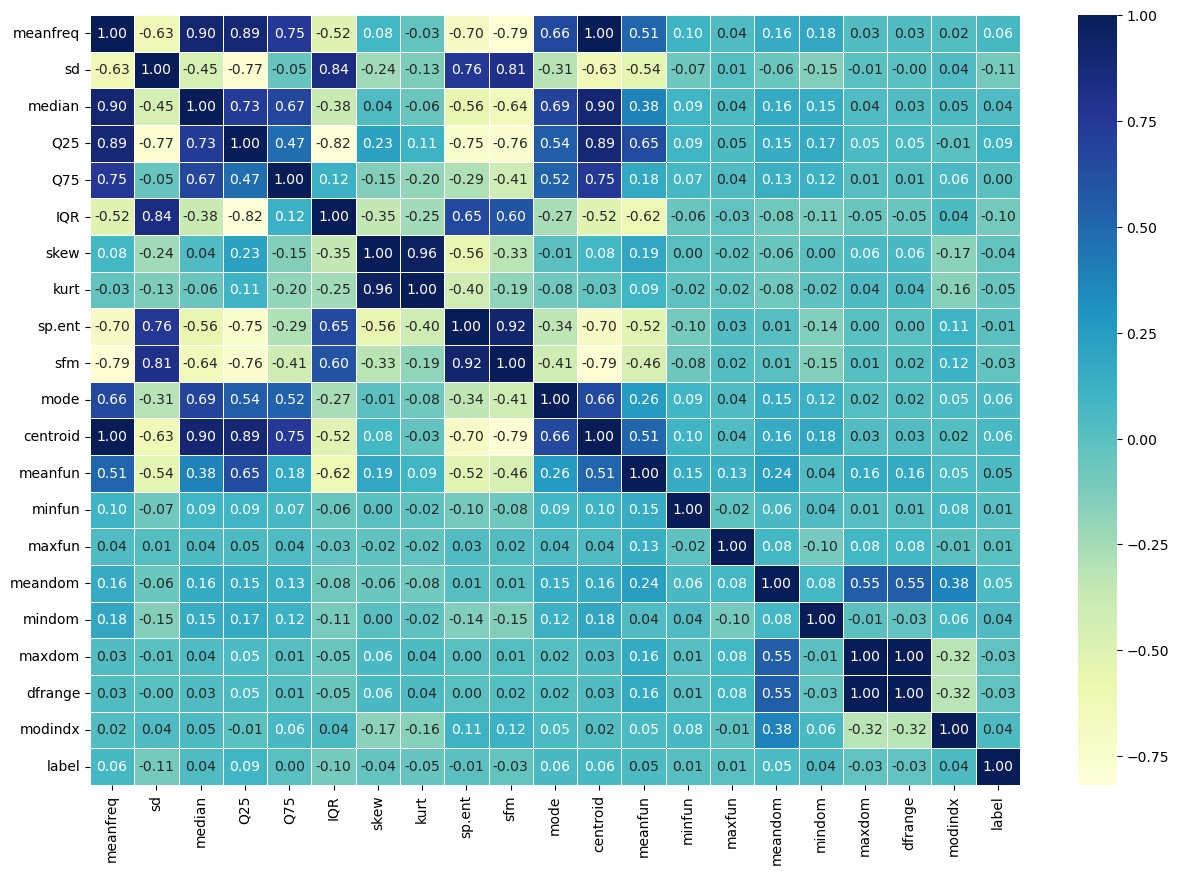

In [39]:
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
model_acc = []

In [42]:
svm_c = 10
svm_gamma = 0.1

dtc_md = 8

rfc_M = 14
rfc_d = 14
rfc_m = 16

In [43]:
SVM_model = SVC(C=svm_c, gamma=svm_gamma).fit(X_train, y_train)
train_acc = SVM_model.score(X_train, y_train)
test_acc = SVM_model.score(X_test, y_test)
m = 'SVM'
model_acc.append([m, train_acc, test_acc])

DTC_model = DecisionTreeClassifier(max_depth=dtc_md).fit(X_train, y_train)
train_acc = DTC_model.score(X_train, y_train)
test_acc = DTC_model.score(X_test, y_test)
m = 'Decision Tree Classifier'
model_acc.append([m, train_acc, test_acc])

RFC_model = RandomForestClassifier(n_estimators=rfc_M, max_features=rfc_d, max_depth=rfc_m, random_state=0).fit(X_train, y_train)
train_acc = RFC_model.score(X_train, y_train)
test_acc = RFC_model.score(X_test, y_test)
m = 'Random Forest Classifier'
model_acc.append([m, train_acc, test_acc])

In [44]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(DTC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.030929963504796557'],
       ['sd', '0.06730972168857186'],
       ['median', '0.02948549627741185'],
       ['Q25', '0.05718462851085453'],
       ['Q75', '0.06448666932519768'],
       ['IQR', '0.042083264585745656'],
       ['skew', '0.07930616567484833'],
       ['kurt', '0.0200931701910604'],
       ['sp.ent', '0.05597520584302656'],
       ['sfm', '0.144429908043995'],
       ['mode', '0.0775682346295354'],
       ['centroid', '0.02195678529458065'],
       ['meanfun', '0.0904303862750145'],
       ['minfun', '0.02584916907067915'],
       ['maxfun', '0.010757400881037585'],
       ['meandom', '0.053734512203150814'],
       ['mindom', '0.014870781606699851'],
       ['maxdom', '0.05234469422926791'],
       ['dfrange', '0.0191021661383495'],
       ['modindx', '0.04210167602617601']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

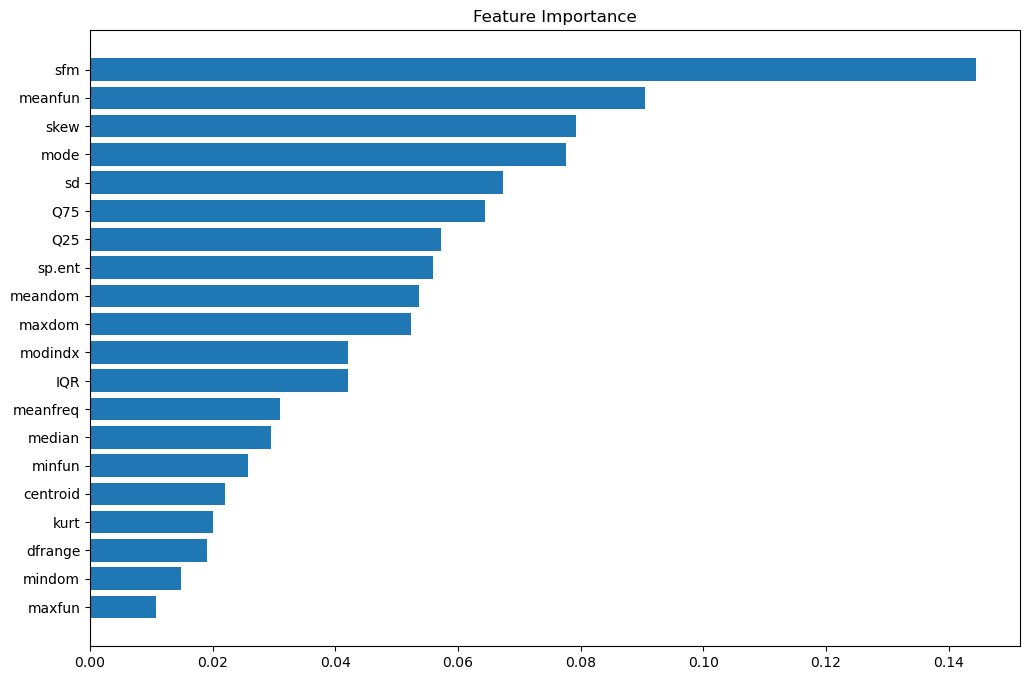

In [45]:
importances = DTC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [46]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(RFC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.03415026035824368'],
       ['sd', '0.059613519981515775'],
       ['median', '0.04820835544949487'],
       ['Q25', '0.0645446304803744'],
       ['Q75', '0.05204836707565309'],
       ['IQR', '0.055630072882106696'],
       ['skew', '0.04568209655103954'],
       ['kurt', '0.03866439023933554'],
       ['sp.ent', '0.05276947833091959'],
       ['sfm', '0.07987411190051578'],
       ['mode', '0.07178937998599909'],
       ['centroid', '0.032452108854725305'],
       ['meanfun', '0.07009999446913671'],
       ['minfun', '0.04378920520356424'],
       ['maxfun', '0.019887939238290315'],
       ['meandom', '0.06523766950484741'],
       ['mindom', '0.008644335891130478'],
       ['maxdom', '0.04481998890530349'],
       ['dfrange', '0.051809098571366195'],
       ['modindx', '0.06028499612643778']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

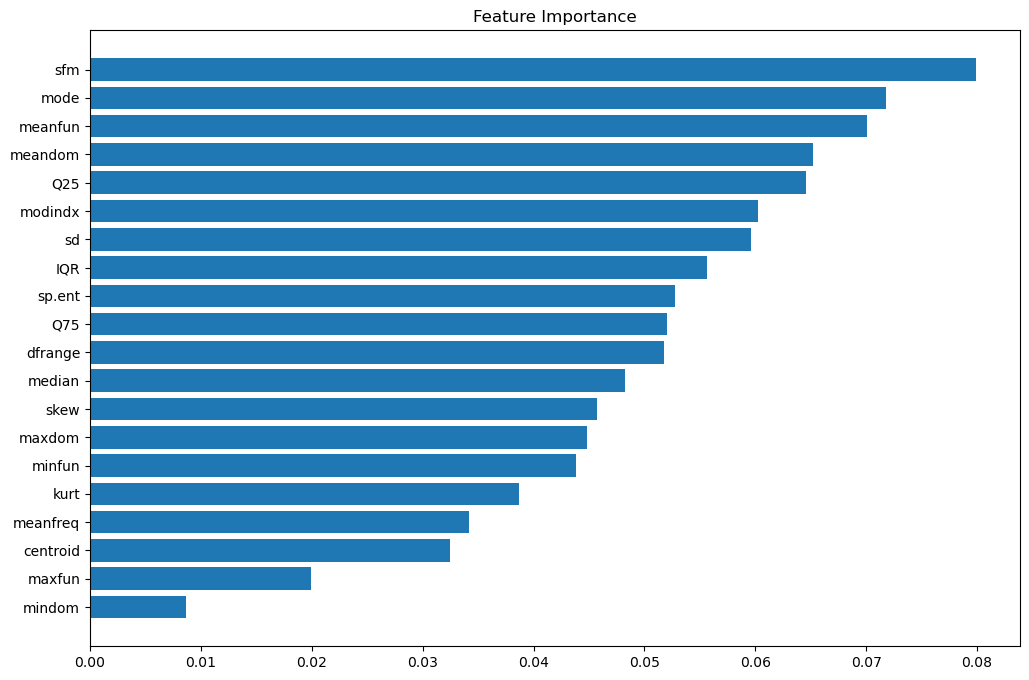

In [47]:
importances = RFC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')


In [48]:
result = pd.DataFrame(model_acc, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])
result[['Model', 'Training Accuracy', 'Validation Accuracy']]

,Model,Training Accuracy,Validation Accuracy
0,SVM,0.553517,0.489459
1,Decision Tree Classifier,0.668807,0.476627
2,Random Forest Classifier,0.982875,0.571036


## Emotion Detection

In [49]:
df = pd.read_csv(r"C:\DATASCIENCE\RonyProject\Age and Emotion Detection through voice\cleaned_emotion.csv")

In [50]:
df.head()

,Unnamed: 0.1,Unnamed: 0,X,meanfreq,sd,median,Q25,Q75,IQR,skew,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0,1,1,0.181338,0.060495,0.187476,0.126197,0.233586,0.107389,0.869088,...,0.181338,0.137742,0.023022,0.271186,0.777344,0.085938,6.226562,6.140625,0.116586,sad
1,1,2,2,0.186897,0.062260,0.195070,0.130847,0.243987,0.113140,1.191767,...,0.186897,0.121811,0.018412,0.271186,0.930339,0.085938,4.000000,3.914062,0.144983,sad
2,2,3,3,0.189102,0.062901,0.204945,0.131422,0.249978,0.118556,1.312690,...,0.189102,0.123758,0.083333,0.262295,0.332386,0.085938,0.625000,0.539062,0.334783,sad
3,4,5,5,0.183036,0.060051,0.174115,0.129949,0.236967,0.107017,1.096409,...,0.183036,0.128469,0.044693,0.258065,1.012019,0.085938,5.468750,5.382812,0.304910,sad
4,5,6,6,0.168793,0.057910,0.156266,0.116783,0.216326,0.099543,1.386837,...,0.168793,0.109720,0.022472,0.235294,0.228795,0.093750,0.750000,0.656250,0.306777,sad


In [51]:
df=df.drop([df.columns[0], df.columns[1], df.columns[2]],axis=1)
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [52]:
df.shape

(909, 21)

In [53]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.206170,0.051275,0.212524,0.177508,0.244574,0.067065,2.095407,8.336008,0.884311,0.298569,0.220830,0.206170,0.166384,0.032167,0.259240,0.791625,0.129787,4.224534,4.094747,0.204235
std,0.023133,0.014841,0.027557,0.038010,0.017223,0.029831,0.614903,3.511599,0.036912,0.134277,0.047916,0.023133,0.032946,0.018036,0.018766,0.318400,0.101413,1.966856,1.958441,0.070437
min,0.138892,0.024114,0.139472,0.046111,0.193367,0.020098,0.681156,2.657216,0.783243,0.074134,0.084523,0.138892,0.074660,0.015640,0.192771,0.107319,0.000000,0.234375,0.085938,0.009846
25%,0.185884,0.037961,0.191591,0.146098,0.232371,0.042470,1.628812,5.531592,0.854904,0.182142,0.195945,0.185884,0.141497,0.018328,0.250000,0.544271,0.000000,2.960938,2.781250,0.151972
50%,0.207456,0.049979,0.216077,0.184609,0.245731,0.057073,2.068654,7.563524,0.885243,0.281802,0.231820,0.207456,0.173804,0.024768,0.266667,0.765625,0.148438,4.500000,4.367188,0.194397
75%,0.226357,0.062497,0.233591,0.211461,0.259418,0.092380,2.504630,10.571021,0.917343,0.405891,0.263500,0.226357,0.192616,0.040921,0.275862,1.005729,0.210938,5.875000,5.734375,0.245702
max,0.250264,0.100239,0.264487,0.250455,0.274048,0.173421,3.800316,18.224444,0.959177,0.710205,0.280000,0.250264,0.228604,0.086957,0.275862,1.724888,0.500000,6.992188,6.992188,0.401399


In [54]:
df.label.value_counts()

sad      314
angry    302
happy    293
Name: label, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  909 non-null    float64
 1   sd        909 non-null    float64
 2   median    909 non-null    float64
 3   Q25       909 non-null    float64
 4   Q75       909 non-null    float64
 5   IQR       909 non-null    float64
 6   skew      909 non-null    float64
 7   kurt      909 non-null    float64
 8   sp.ent    909 non-null    float64
 9   sfm       909 non-null    float64
 10  mode      909 non-null    float64
 11  centroid  909 non-null    float64
 12  meanfun   909 non-null    float64
 13  minfun    909 non-null    float64
 14  maxfun    909 non-null    float64
 15  meandom   909 non-null    float64
 16  mindom    909 non-null    float64
 17  maxdom    909 non-null    float64
 18  dfrange   909 non-null    float64
 19  modindx   909 non-null    float64
 20  label     909 non-null    object

In [56]:
dict = {'label':{'sad':0,'angry':1, 'happy':2}}      
df.replace(dict,inplace = True)           
X = df.loc[:, df.columns != 'label']
y = df.loc[:,'label']

<Axes: >

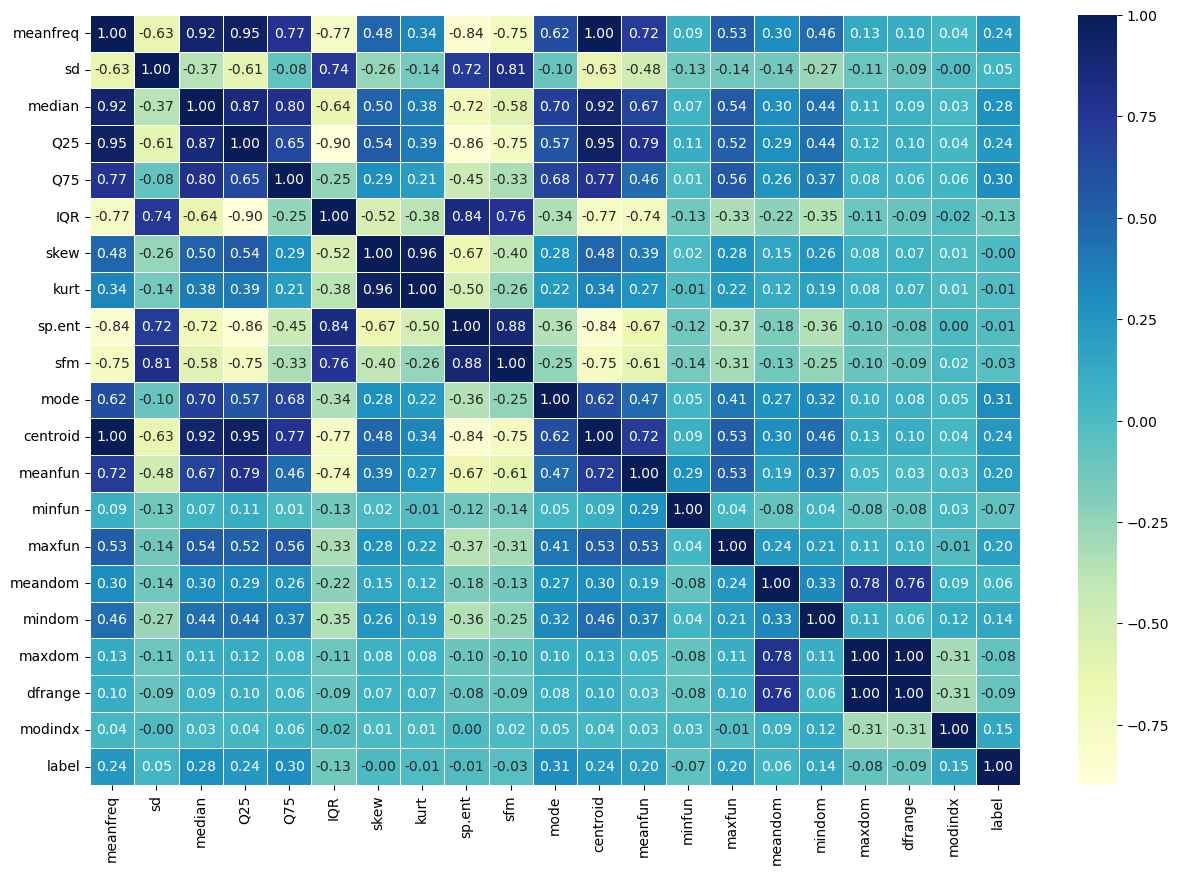

In [57]:
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
model_acc = []

In [60]:
svm_c = 1000
svm_gamma = 0.01

dtc_md = 4

rfc_M = 14
rfc_d = 8
rfc_m = 16

In [61]:
SVM_model = SVC(C=svm_c, gamma=svm_gamma).fit(X_train, y_train)
train_acc = SVM_model.score(X_train, y_train)
test_acc = SVM_model.score(X_test, y_test)
m = 'SVM'
model_acc.append([m, train_acc, test_acc])

DTC_model = DecisionTreeClassifier(max_depth=dtc_md).fit(X_train, y_train)
train_acc = DTC_model.score(X_train, y_train)
test_acc = DTC_model.score(X_test, y_test)
m = 'Decision Tree Classifier'
model_acc.append([m, train_acc, test_acc])

RFC_model = RandomForestClassifier(n_estimators=rfc_M, max_features=rfc_d, max_depth=rfc_m, random_state=0).fit(X_train, y_train)
train_acc = RFC_model.score(X_train, y_train)
test_acc = RFC_model.score(X_test, y_test)
m = 'Random Forest Classifier'
model_acc.append([m, train_acc, test_acc])

In [62]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(DTC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.027174306601720502'],
       ['sd', '0.0529000283068867'],
       ['median', '0.0'],
       ['Q25', '0.12902951184869593'],
       ['Q75', '0.0'],
       ['IQR', '0.12905942069825413'],
       ['skew', '0.0'],
       ['kurt', '0.0'],
       ['sp.ent', '0.2264975990650453'],
       ['sfm', '0.010724273984354542'],
       ['mode', '0.24218225934303722'],
       ['centroid', '0.0'],
       ['meanfun', '0.0'],
       ['minfun', '0.0'],
       ['maxfun', '0.0'],
       ['meandom', '0.18243260015200563'],
       ['mindom', '0.0'],
       ['maxdom', '0.0'],
       ['dfrange', '0.0'],
       ['modindx', '0.0']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

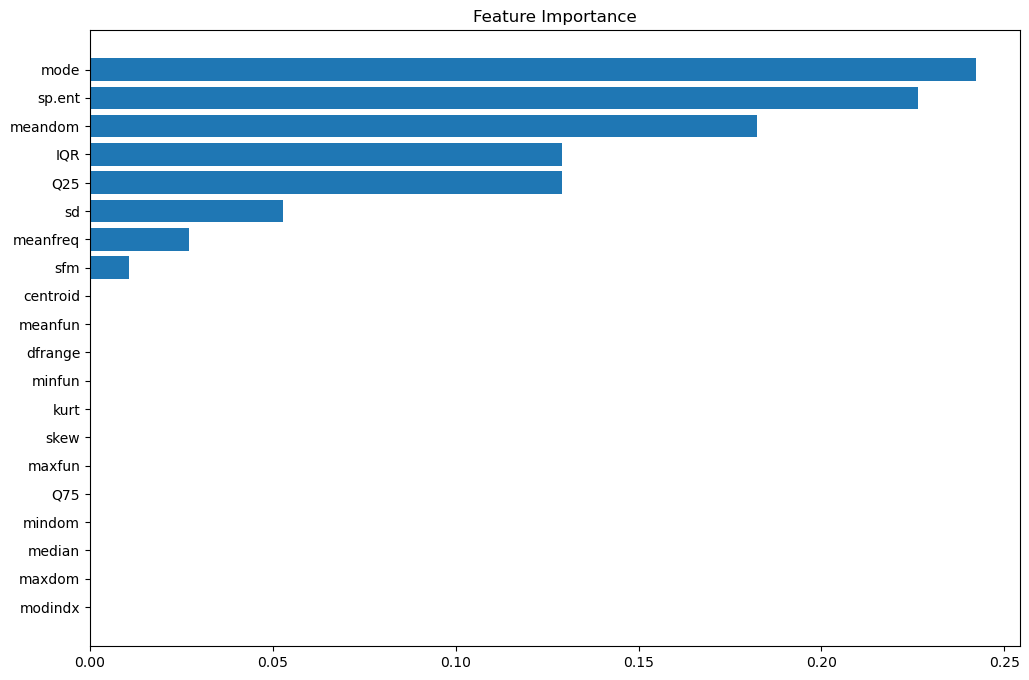

In [63]:
importances = DTC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [64]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(RFC_model.feature_importances_)]).T

Feature importance: 


array([['meanfreq', '0.04052721175187489'],
       ['sd', '0.055202618114788236'],
       ['median', '0.05680298817732615'],
       ['Q25', '0.04788996469718573'],
       ['Q75', '0.041979920647286686'],
       ['IQR', '0.05536180386219842'],
       ['skew', '0.027279860795587838'],
       ['kurt', '0.03351086201962255'],
       ['sp.ent', '0.08276298633624267'],
       ['sfm', '0.04750023261561371'],
       ['mode', '0.08002128114493778'],
       ['centroid', '0.029952229845371894'],
       ['meanfun', '0.06974119012287132'],
       ['minfun', '0.03609296316039135'],
       ['maxfun', '0.028228117824383694'],
       ['meandom', '0.09025335707742749'],
       ['mindom', '0.026864264981324906'],
       ['maxdom', '0.04187752806130829'],
       ['dfrange', '0.046791480191749606'],
       ['modindx', '0.061359138572506904']], dtype='<U32')

Text(0.5, 1.0, 'Feature Importance')

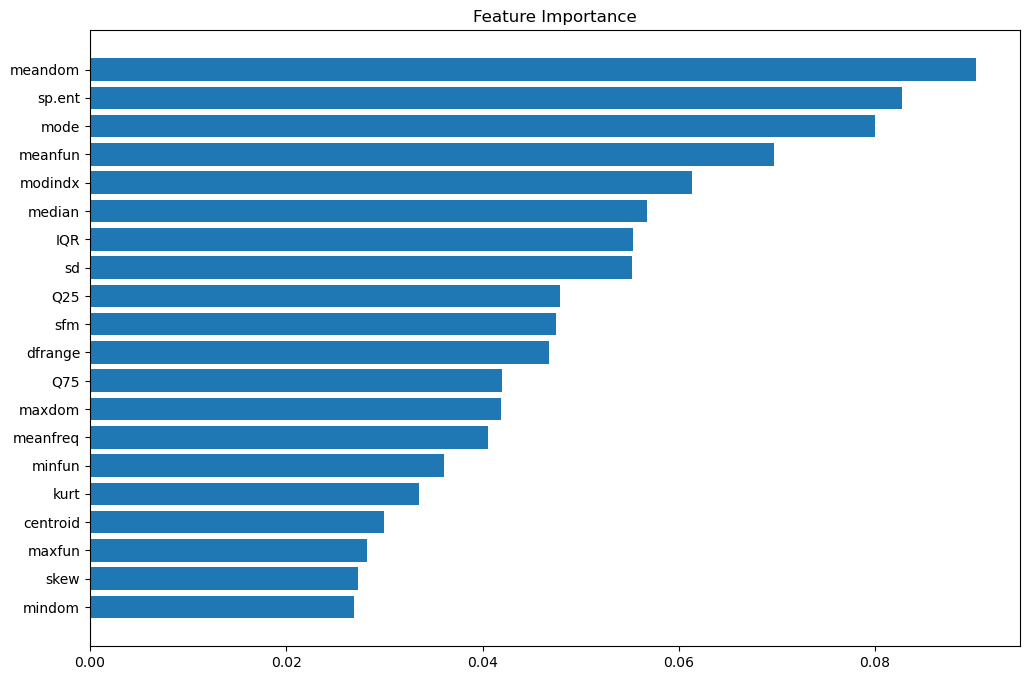

In [65]:
importances = RFC_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Feature Importance')

In [66]:
result = pd.DataFrame(model_acc, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])
result[['Model', 'Training Accuracy', 'Validation Accuracy']]

,Model,Training Accuracy,Validation Accuracy
0,SVM,0.679883,0.570175
1,Decision Tree Classifier,0.628488,0.539474
2,Random Forest Classifier,0.986784,0.600877
